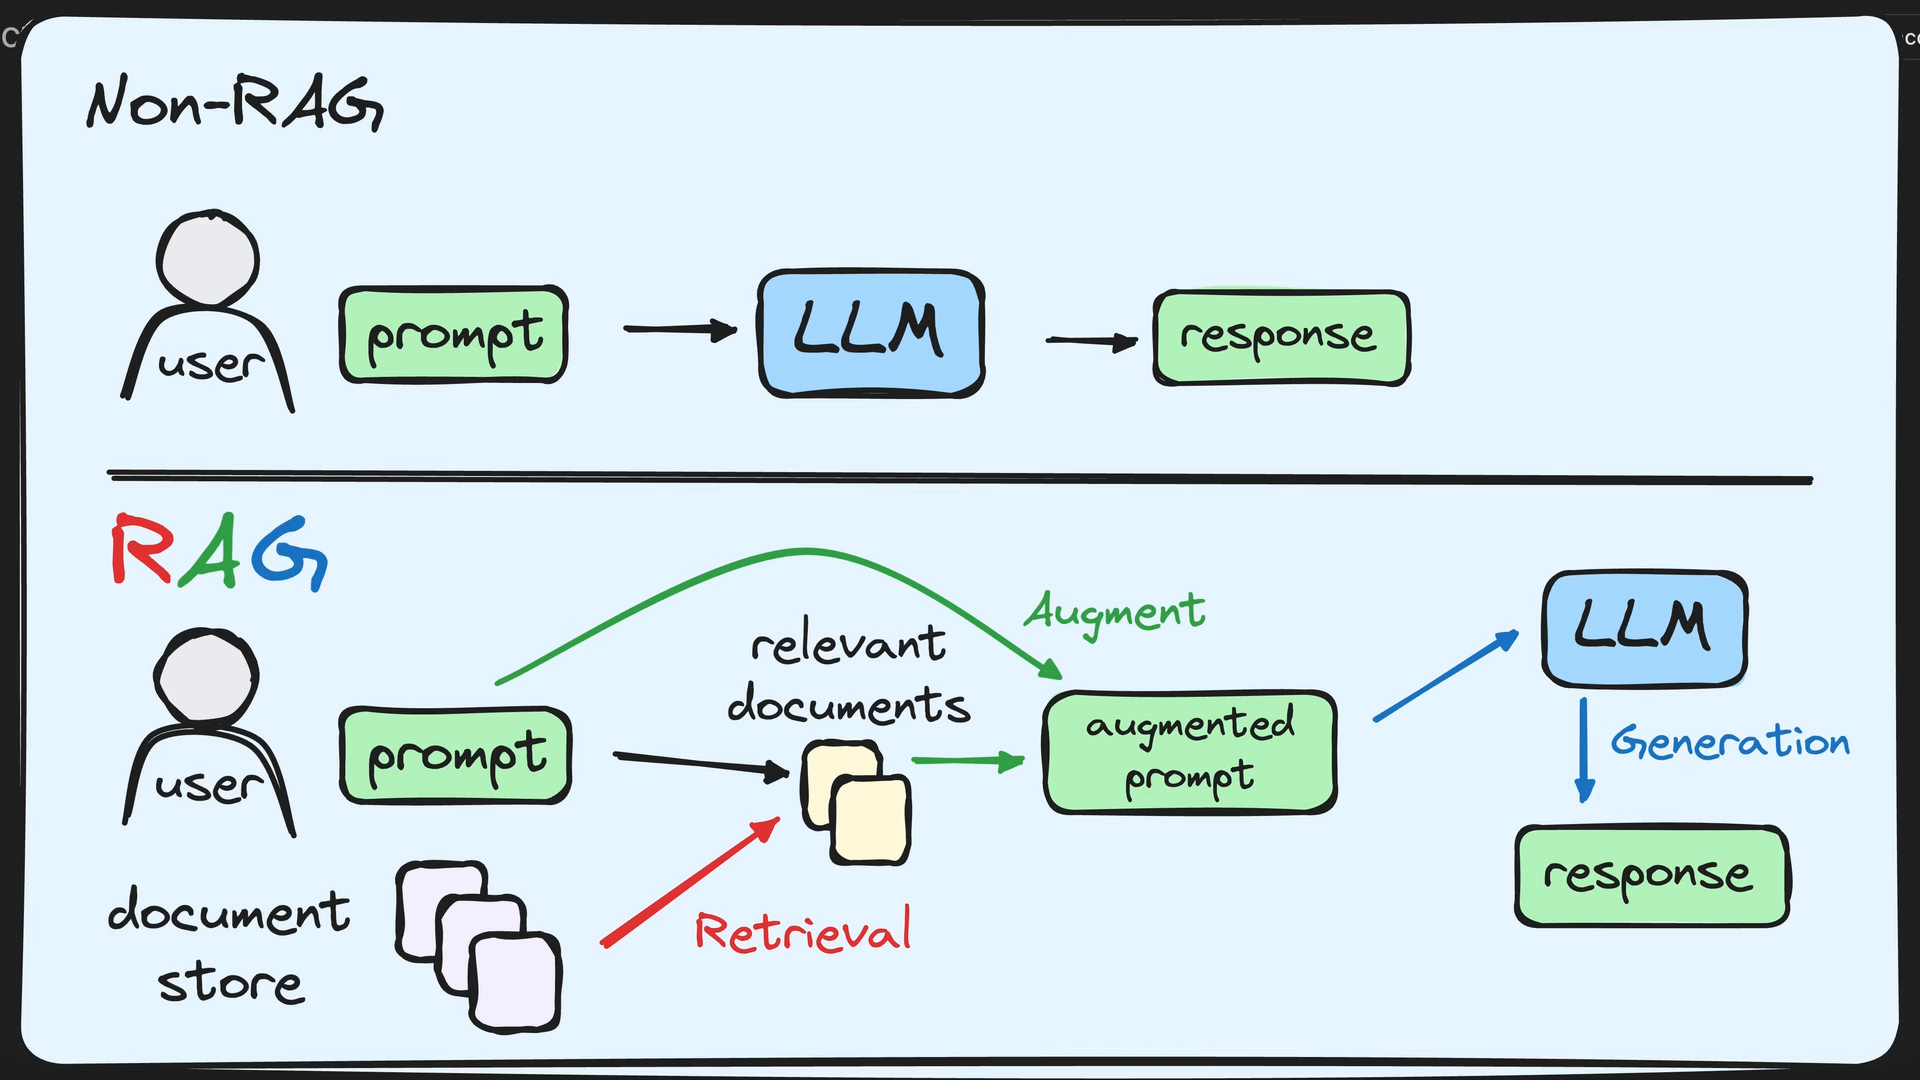

In [2]:
pip install faiss-cpu

   ---------------------------------------- 0.0/18.2 MB ? eta -:--:--
    --------------------------------------- 0.3/18.2 MB ? eta -:--:--
   -- ------------------------------------- 1.0/18.2 MB 3.3 MB/s eta 0:00:06
   ---- ----------------------------------- 1.8/18.2 MB 3.6 MB/s eta 0:00:05
   ----- ---------------------------------- 2.6/18.2 MB 3.5 MB/s eta 0:00:05
   -------- ------------------------------- 3.7/18.2 MB 3.8 MB/s eta 0:00:04
   ----------- ---------------------------- 5.2/18.2 MB 4.5 MB/s eta 0:00:03
   ---------------- ----------------------- 7.3/18.2 MB 5.4 MB/s eta 0:00:03
   ------------------- -------------------- 8.7/18.2 MB 5.8 MB/s eta 0:00:02
   ----------------------- ---------------- 10.7/18.2 MB 6.1 MB/s eta 0:00:02
   ---------------------------- ----------- 13.1/18.2 MB 6.6 MB/s eta 0:00:01
   ---------------------------------- ----- 15.5/18.2 MB 7.0 MB/s eta 0:00:01
   -------------------------------------- - 17.6/18.2 MB 7.3 MB/s eta 0:00:01
   ------

In [4]:
pip install langchain-community


   ---------------------------------------- 0.0/2.5 MB ? eta -:--:--
   ------------------------ --------------- 1.6/2.5 MB 7.5 MB/s eta 0:00:01
   ---------------------------------------- 2.5/2.5 MB 7.5 MB/s  0:00:00
   ---------------------------------------- 0.0/1.0 MB ? eta -:--:--
   ---------------------------------------- 1.0/1.0 MB 5.8 MB/s  0:00:00
   ---------------------------------------- 0.0/2.1 MB ? eta -:--:--
   ----------------------------- ---------- 1.6/2.1 MB 8.5 MB/s eta 0:00:01
   ---------------------------------------- 2.1/2.1 MB 7.0 MB/s  0:00:00

   -- -------------------------------------  2/32 [PyYAML]
   ------- --------------------------------  6/32 [mypy-extensions]
   ---------- -----------------------------  8/32 [marshmallow]
   --------------- ------------------------ 12/32 [greenlet]
   ----------------- ---------------------- 14/32 [aiohappyeyeballs]
   --------------------- ------------------ 17/32 [SQLAlchemy]
   --------------------- ------------

In [6]:
%pip install sentence-transformers

  Using cached sentence_transformers-5.1.0-py3-none-any.whl.metadata (16 kB)
  Using cached transformers-4.56.1-py3-none-any.whl.metadata (42 kB)
  Using cached torch-2.8.0-cp313-cp313-win_amd64.whl.metadata (30 kB)
  Using cached scikit_learn-1.7.2-cp313-cp313-win_amd64.whl.metadata (11 kB)
  Using cached huggingface_hub-0.35.0-py3-none-any.whl.metadata (14 kB)
  Using cached tokenizers-0.22.0-cp39-abi3-win_amd64.whl.metadata (6.9 kB)
Using cached sentence_transformers-5.1.0-py3-none-any.whl (483 kB)
Using cached transformers-4.56.1-py3-none-any.whl (11.6 MB)
Using cached huggingface_hub-0.35.0-py3-none-any.whl (563 kB)
Using cached tokenizers-0.22.0-cp39-abi3-win_amd64.whl (2.7 MB)
Using cached torch-2.8.0-cp313-cp313-win_amd64.whl (241.3 MB)
Using cached scikit_learn-1.7.2-cp313-cp313-win_amd64.whl (8.7 MB)

   ---------------------------------------- 0/6 [torch]
   ---------------------------------------- 0/6 [torch]
   ---------------------------------------- 0/6 [torch]
   ------

In [7]:
import os
import google.generativeai as genai
from langchain.vectorstores import FAISS # This will be the vector database.
from langchain.embeddings import HuggingFaceEmbeddings # This is to perform word embeddings
from langchain.text_splitter import RecursiveCharacterTextSplitter # This is to split the text into chunks.
from pypdf import PdfReader # This is to read the PDF files.
import faiss

c:\Users\zaido\AppData\Local\Programs\Python\Python313\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [10]:
# Step 1: Configure the model.

# Configure LLM

key=os.environ.get("GOOGLE_API_KEY")
genai.configure(api_key=key)
llm_model=genai.GenerativeModel("gemini-2.5-flash-lite")


# Configure the embedding model
embedding_model = HuggingFaceEmbeddings(model_name="all-MiniLM-L6-v2")


C:\Users\zaido\AppData\Local\Temp\ipykernel_29520\3566105408.py:11: LangChainDeprecationWarning: The class `HuggingFaceEmbeddings` was deprecated in LangChain 0.2.2 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-huggingface package and should be used instead. To use it run `pip install -U :class:`~langchain-huggingface` and import as `from :class:`~langchain_huggingface import HuggingFaceEmbeddings``.
  embedding_model = HuggingFaceEmbeddings(model_name="all-MiniLM-L6-v2")
c:\Users\zaido\AppData\Local\Programs\Python\Python313\Lib\site-packages\huggingface_hub\file_download.py:143: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\zaido\.cache\huggingface\hub\models--sentence-transformers--all-MiniLM-L6-v2. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled 

In [ ]:
# Step-2 : Loading the pdf file and extract the text.

loaded_file=PdfReader("Rag Chatbot.pdf")
loaded_file

In [ ]:
raw_text=""
for page in loaded_file.pages:
    text_only = page.extract_text()

    if text_only:
        raw_text+=text_only

In [14]:
print(raw_text)

Case Study: RAG Chatbot Powered by Google 
Gemini for Smart Document Q&A 
Project Title: Intelligent Document Q&A Assistant using Retrieval-Augmented Generation 
(RAG) with Gemini 
GitHub Repository: https://github.com/mukul-mschauhan/RAG-Using-Gemini 
Live Demo: https://gemini-rag2025.streamlit.app/ 
 
Problem Statement 
Across industries such as legal, finance, healthcare, and construction, professionals are 
required to extract insights from massive document repositories—contracts, product 
manuals, policies, reports, regulations, and emails. 
Traditional keyword-based search and static FAQs fail to deliver contextual, accurate 
answers. Employees waste hours scanning PDFs and notes, leading to operational 
inefficiencies, poor decision-making, and knowledge silos. 
There’s a critical need for an intelligent assistant that can understand natural language 
questions, reason over domain-specific documents, and deliver precise responses—
instantly. 
 
Business Objective 
To build an en

In [17]:
# Step 3 : Chunking (Create Chunks of text)
splitter=RecursiveCharacterTextSplitter(chunk_size=500,chunk_overlap=200)
chunks=splitter.split_text(raw_text)

In [18]:
print(chunks)

['Case Study: RAG Chatbot Powered by Google \nGemini for Smart Document Q&A \nProject Title: Intelligent Document Q&A Assistant using Retrieval-Augmented Generation \n(RAG) with Gemini \nGitHub Repository: https://github.com/mukul-mschauhan/RAG-Using-Gemini \nLive Demo: https://gemini-rag2025.streamlit.app/ \n \nProblem Statement \nAcross industries such as legal, finance, healthcare, and construction, professionals are \nrequired to extract insights from massive document repositories—contracts, product', 'Problem Statement \nAcross industries such as legal, finance, healthcare, and construction, professionals are \nrequired to extract insights from massive document repositories—contracts, product \nmanuals, policies, reports, regulations, and emails. \nTraditional keyword-based search and static FAQs fail to deliver contextual, accurate \nanswers. Employees waste hours scanning PDFs and notes, leading to operational \ninefficiencies, poor decision-making, and knowledge silos.', 'answe

In [19]:
len(chunks)

13

In [20]:
# Step-4 : Create FAISS Vector Store
vectorstore=FAISS.from_texts(chunks,embedding_model)

In [24]:
# step-5: Configure Retriever

retriever=vectorstore.as_retriever(search_type="similarity",search_kwargs={"k":3})

In [25]:
# Step-6 : Take the query 
query="Show me the steps to proceed with this project."


In [26]:
# Step-7: Retrieval (R)
retrived_docs=retriever.get_relevant_documents(query)

C:\Users\zaido\AppData\Local\Temp\ipykernel_29520\3341470832.py:2: LangChainDeprecationWarning: The method `BaseRetriever.get_relevant_documents` was deprecated in langchain-core 0.1.46 and will be removed in 1.0. Use :meth:`~invoke` instead.
  retrived_docs=retriever.get_relevant_documents(query)


In [27]:
for i in retrived_docs:
    print(i.page_content)
    print("\n---\n")

built analytics dashboard 
 
For the complete implementation, visit the GitHub repo: 跚跛跜距 https://github.com/mukul-
mschauhan/RAG-Using-Gemini 
Try the live chatbot: 뜜뜝뜡뜢뜞뜟뜠 https://gemini-rag2025.streamlit.app/

---

Case Study: RAG Chatbot Powered by Google 
Gemini for Smart Document Q&A 
Project Title: Intelligent Document Q&A Assistant using Retrieval-Augmented Generation 
(RAG) with Gemini 
GitHub Repository: https://github.com/mukul-mschauhan/RAG-Using-Gemini 
Live Demo: https://gemini-rag2025.streamlit.app/ 
 
Problem Statement 
Across industries such as legal, finance, healthcare, and construction, professionals are 
required to extract insights from massive document repositories—contracts, product

---

4. Ask questions in natural language 
5. Get contextual answers generated by Google Gemini 1.5 Flash using the retrieved 
documents 
 
Architecture Overview 
1. Frontend: Streamlit web UI for uploading files and chat interface 
2. Document Processing: Text extraction using PyMu

In [ ]:
context=" ".join([doc.page_content for doc in retrived_docs])
context

'built analytics dashboard \n \nFor the complete implementation, visit the GitHub repo: 跚跛跜距 https://github.com/mukul-\nmschauhan/RAG-Using-Gemini \nTry the live chatbot: 뜜뜝뜡뜢뜞뜟뜠 https://gemini-rag2025.streamlit.app/ Case Study: RAG Chatbot Powered by Google \nGemini for Smart Document Q&A \nProject Title: Intelligent Document Q&A Assistant using Retrieval-Augmented Generation \n(RAG) with Gemini \nGitHub Repository: https://github.com/mukul-mschauhan/RAG-Using-Gemini \nLive Demo: https://gemini-rag2025.streamlit.app/ \n \nProblem Statement \nAcross industries such as legal, finance, healthcare, and construction, professionals are \nrequired to extract insights from massive document repositories—contracts, product 4. Ask questions in natural language \n5. Get contextual answers generated by Google Gemini 1.5 Flash using the retrieved \ndocuments \n \nArchitecture Overview \n1. Frontend: Streamlit web UI for uploading files and chat interface \n2. Document Processing: Text extraction us

In [34]:
# Step -8 : Write a Augmented prompt (A)
prompt=f"""You are a helpful assistant using RAG.
Here is the context {context}

The query asked by the user is as follows: {query}
"""

In [35]:
# Step-9: Generation (G)

print(llm_model.generate_content(prompt).text)

Here are the steps to proceed with this project, based on the provided information:

1.  **Set up the Frontend:**
    *   Use Streamlit to create a web UI.
    *   This UI will allow users to upload documents and interact with the chatbot through a chat interface.

2.  **Process Documents:**
    *   Extract text from the uploaded documents. The project mentions using **PyMuPDF** for this.
    *   Implement a **chunking logic** to break down the extracted text into smaller, manageable pieces.

3.  **Generate Embeddings:**
    *   Create embeddings (numerical representations) for each text chunk.
    *   The project suggests using **Google-compatible embeddings** (like Gemini/Vertex-compatible) or embeddings from **SentenceTransformers**.

4.  **Store Embeddings in a Vector Store:**
    *   Utilize **FAISS** (Facebook AI Similarity Search) as the vector store.
    *   Store the generated embeddings in FAISS to enable efficient similarity search.

5.  **Implement the Chatbot Functionality